In [141]:
# Import libraries =============================================================
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

In [142]:
patient_df = pd.read_csv('CV_data/GBM_all_thresholded.by_genes.txt', sep='\t',
                         index_col=0)
patient_df = patient_df.T
patient_df = patient_df.drop(['Locus ID', 'Cytoband'])
# temp = pd.read_csv('CV_data/LGG_all_thresholded.by_genes.txt', sep = '\t',
#                    index_col=0)
# temp = temp.T
# temp = temp.drop(['Locus ID', 'Cytoband'])

# patient_df = pd.concat([patient_df, temp], axis=0)
patient_df

Gene Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,RPL23AP82,SBF1,SCO2,SELO,SHANK3,SYCE3,TRABD,TUBGCP6,TYMP,ZBED4
TCGA-02-0001-01,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0003-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0006-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0007-01,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-02-0009-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-87-5896-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-OX-A56R-01,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-RR-A6KA-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-RR-A6KB-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
mdel_pgain_genesets = pd.read_csv('extracted_genesets/mdel_pgain.csv')
mdel_pgain_genesets = mdel_pgain_genesets['Gene Symbol'].tolist()
mdel_pgain_genesets


['A1BG',
 'A1BG-AS1',
 'ACPT',
 'ACTN4',
 'ADCK4',
 'AKT1S1',
 'AKT2',
 'ALDH16A1',
 'ALKBH6',
 'ANKRD27',
 'AP2A1',
 'AP2S1',
 'APLP1',
 'APOC1',
 'APOC1P1',
 'APOC2',
 'APOC4',
 'APOC4-APOC2',
 'APOE',
 'ARHGAP33',
 'ARHGAP35',
 'ARHGEF1',
 'ASPDH',
 'ATF5',
 'ATP1A3',
 'ATP4A',
 'ATP5SL',
 'AURKC',
 'AXL',
 'B3GNT8',
 'B9D2',
 'BAX',
 'BBC3',
 'BCAM',
 'BCAT2',
 'BCKDHA',
 'BCL2L12',
 'BCL3',
 'BIRC8',
 'BLOC1S3',
 'BLVRB',
 'BRSK1',
 'BSPH1',
 'C19orf12',
 'C19orf18',
 'C19orf33',
 'C19orf40',
 'C19orf46',
 'C19orf47',
 'C19orf48',
 'C19orf51',
 'C19orf54',
 'C19orf55',
 'C19orf63',
 'C19orf69',
 'C19orf73',
 'C19orf75',
 'C19orf76',
 'C19orf81',
 'C5AR1',
 'CA11',
 'CABP5',
 'CACNG6',
 'CACNG7',
 'CACNG8',
 'CADM4',
 'CALM3',
 'CAPN12',
 'CAPNS1',
 'CARD8',
 'CATSPERG',
 'CBLC',
 'CCDC106',
 'CCDC114',
 'CCDC155',
 'CCDC61',
 'CCDC8',
 'CCDC9',
 'CCDC97',
 'CCNE1',
 'CD177',
 'CD22',
 'CD33',
 'CD37',
 'CD3EAP',
 'CD79A',
 'CDC42EP5',
 'CEACAM1',
 'CEACAM16',
 'CEACAM18',
 'CEACAM

In [144]:
# keep only genes in the mdel_pgain_genesets
patient_df = patient_df[mdel_pgain_genesets]

In [145]:
patient_df

Gene Symbol,A1BG,A1BG-AS1,ACPT,ACTN4,ADCK4,AKT1S1,AKT2,ALDH16A1,ALKBH6,ANKRD27,...,hsa-mir-526a-1,hsa-mir-526a-2,hsa-mir-526b,hsa-mir-527,hsa-mir-641,hsa-mir-642,hsa-mir-643,hsa-mir-769,hsa-mir-935,hsa-mir-99b
TCGA-02-0001-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0003-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0006-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0007-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0009-01,1,1,-1,1,1,-1,1,-1,1,1,...,-1,-1,-1,-1,1,1,0,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-87-5896-01,1,1,-1,1,-1,-1,1,-1,1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
TCGA-OX-A56R-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-RR-A6KA-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
TCGA-RR-A6KB-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# calculate -2, -1, 0, 1, 2 counts for each rows
patient_calc = pd.DataFrame()
patient_calc['Del'] = ((patient_df == -2) | (patient_df == -1)).sum(axis=1)
patient_calc['Diploid'] = (patient_df == 0).sum(axis=1)
patient_calc['Gain'] = ((patient_df == 1) | (patient_df == 2)).sum(axis=1)



In [147]:
patient_calc

,Del,Diploid,Gain
TCGA-02-0001-01,0,1030,0
TCGA-02-0003-01,0,1030,0
TCGA-02-0006-01,0,1030,0
TCGA-02-0007-01,0,1015,15
TCGA-02-0009-01,342,65,623
...,...,...,...
TCGA-87-5896-01,495,4,531
TCGA-OX-A56R-01,4,1026,0
TCGA-RR-A6KA-01,0,45,985
TCGA-RR-A6KB-01,0,1030,0


In [148]:
# calculate the percentage of each category
patient_pct = pd.DataFrame()
patient_pct['Del'] = patient_calc['Del'] / patient_df.shape[1] * 100
patient_pct['Diploid'] = patient_calc['Diploid'] / patient_df.shape[1] * 100
patient_pct['Gain'] = patient_calc['Gain'] / patient_df.shape[1] * 100

In [149]:
patient_pct = patient_pct.round(2)

In [150]:
patient_pct

,Del,Diploid,Gain
TCGA-02-0001-01,0.00,100.00,0.00
TCGA-02-0003-01,0.00,100.00,0.00
TCGA-02-0006-01,0.00,100.00,0.00
TCGA-02-0007-01,0.00,98.54,1.46
TCGA-02-0009-01,33.20,6.31,60.49
...,...,...,...
TCGA-87-5896-01,48.06,0.39,51.55
TCGA-OX-A56R-01,0.39,99.61,0.00
TCGA-RR-A6KA-01,0.00,4.37,95.63
TCGA-RR-A6KB-01,0.00,100.00,0.00


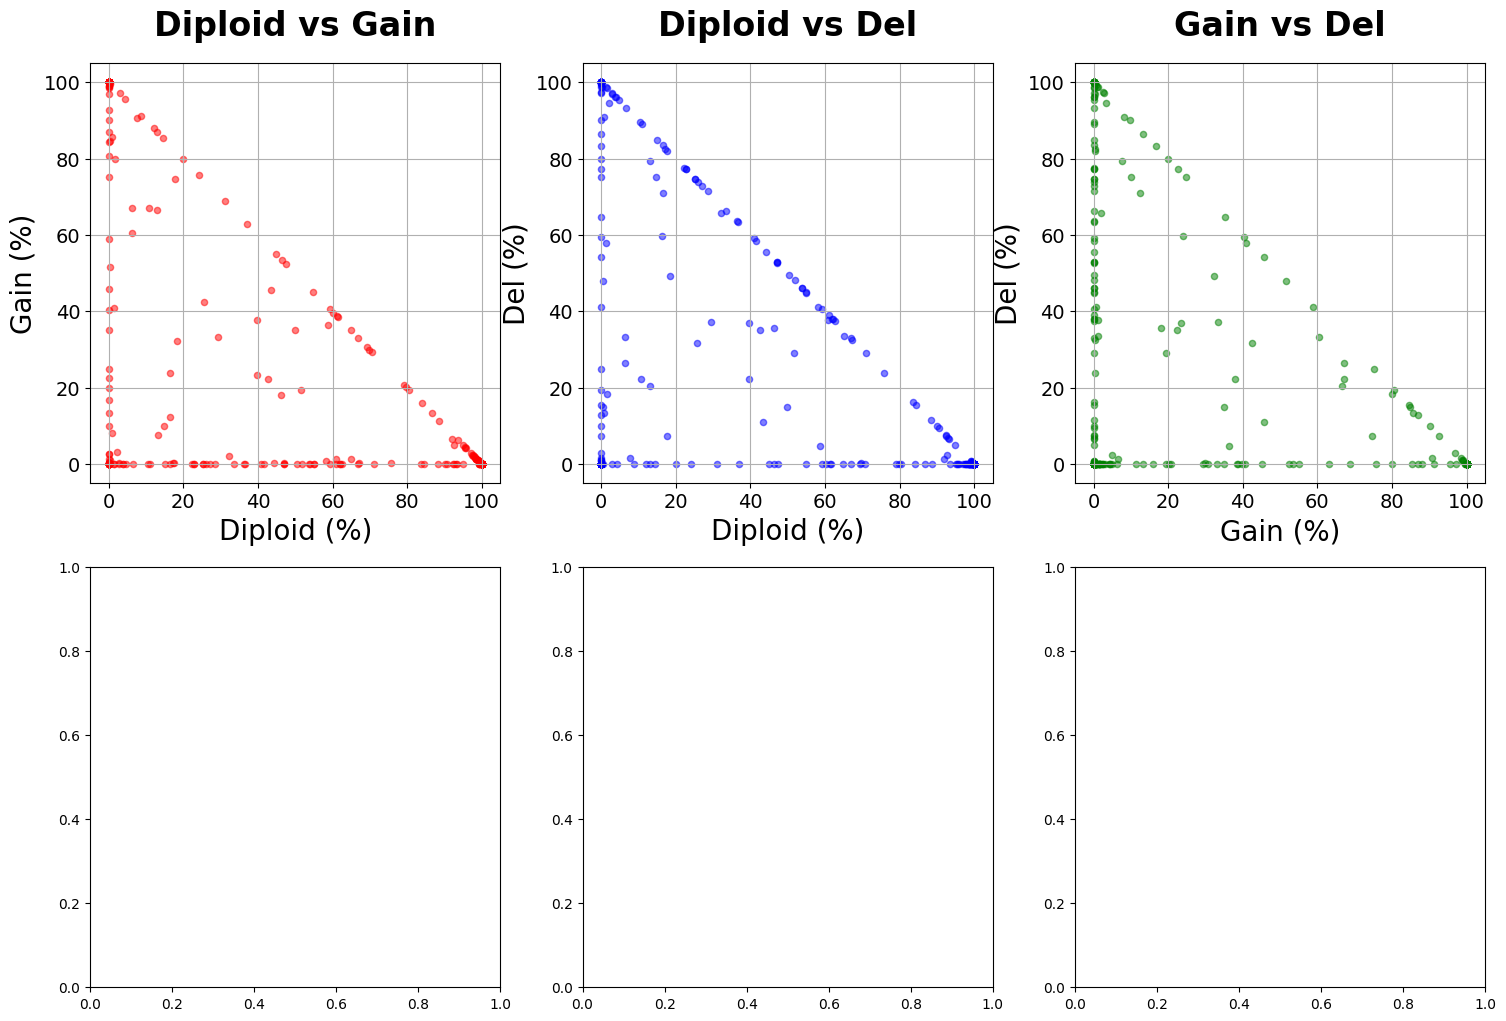

In [151]:
# 그래프 그리기 =====================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Diploid vs Gain_diff에 대한 산점도 함수 정의
def plot_scatter(data, x_col, y_col, color, ax, title, xlabel, ylabel):
    data.plot(kind='scatter', x=x_col, y=y_col, color=color, ax=ax, alpha=0.5)
    ax.set_title(title, fontsize = 24, fontweight = 'bold', pad = 20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)

# 각 산점도에 대한 설정 정의
plot_configs = [
    (patient_pct, 'Diploid', 'Gain', 'red', axes[0, 0], 'Diploid vs Gain', 'Diploid (%)', 'Gain (%)'),
    (patient_pct, 'Diploid', 'Del', 'blue', axes[0, 1], 'Diploid vs Del', 'Diploid (%)', 'Del (%)'),
    (patient_pct, 'Gain', 'Del', 'green', axes[0, 2], 'Gain vs Del', 'Gain (%)', 'Del (%)'),
]
# 각 산점도 그리기
for config in plot_configs:
    plot_scatter(*config)


# 그래프 표시
plt.show()

# Gain > 20과 Gain < 20 환자를 나누기

In [152]:
gain_19_patient = patient_pct[patient_pct['Gain'] >= 10]
non_gain_19_patient = patient_pct[patient_pct['Gain'] < 1]

gain_19_patient = gain_19_patient.index.tolist()
non_gain_19_patient = non_gain_19_patient.index.tolist()

In [153]:
len(gain_19_patient), len(non_gain_19_patient)

(214, 335)

In [154]:
def survival_analysis(merged_df, geneset):
    # :merged_df: Each row is a sample and each column is a gene expression
    # values with and clinical informations
    # :geneset: A list of genes to analyze
    # :return: A dataframe with log-rank test results and long survival group
    
    # make a new dataframe with only the genes in the geneset ==================
    result_df = pd.DataFrame(index=geneset,
                            columns=['log_rank', 'p_value', 'long_survival'])
    result_df[:] = np.nan   # fill the dataframe with NaN
    
    for gene in geneset:
        upper_quartile_threshold = merged_df[gene].quantile(0.75)
        lower_quartile_threshold = merged_df[gene].quantile(0.25)
        high_df = merged_df[merged_df[gene] >= upper_quartile_threshold]
        low_df = merged_df[merged_df[gene] <= lower_quartile_threshold]
        
        median_high = high_df['OS'].median()
        median_low = low_df['OS'].median()
        
        result = logrank_test(low_df['OS'],
                        high_df['OS'],
                        event_observed_A = low_df['Censor'],
                        event_observed_B = high_df['Censor'])

        result_df.at[gene, 'log_rank'] = result.test_statistic
        result_df.at[gene, 'p_value'] = result.p_value
        
        if median_high > median_low:
            result_df.at[gene, 'long_survival'] = 'high'
        elif median_high < median_low:
            result_df.at[gene, 'long_survival'] = 'low'
        else:
            result_df.at[gene, 'long_survival'] = 'same'
            
    return result_df

def plotting_and_analysis (result_df, cut_off=0.01, filename='', format='pdf'):
    # Modify the result_df for plotting ========================================
    df_plot = result_df[result_df['long_survival'] != 'same'].copy()
    df_plot.loc[df_plot['long_survival'] == 'low', 'log_rank'] *= -1
    df_top = df_plot.sort_values(by = 'log_rank', ascending = False).head(20)
    df_bot = df_plot.sort_values(by = 'log_rank', ascending = True).head(20)
    df_text = pd.concat([df_top, df_bot]).drop_duplicates()

    # Plotting =================================================================
    plt.figure(figsize=(6.6, 6))
    sns.scatterplot(
        x='log_rank',
        y=-np.log10(df_plot['p_value'].astype(float)),
        data=df_plot,
        hue='long_survival',
        # style='long_survival',
        s=100,
        palette={'high': 'firebrick', 'low': 'royalblue'})


In [155]:
clinicalDataPath = '/home/jsw/BI/Database/Glioma_clinical/'
result_path = 'survival_results/'

# Import libraries =============================================================
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


In [156]:
# Load clinical data ===========================================================
tcga_clinical = pd.read_csv(f'{clinicalDataPath}TCGA_mRNAseq_702_clinical.txt',
                            sep='\t', index_col = 0)
tcga_clinical = tcga_clinical.dropna(subset = ['Grade', 'OS'])

# tcga_genes = pd.read_csv(f'{clinicalDataPath}TCGA_mRNAseq_702.txt', sep='\t',
#                          index_col = 0).T
# tcga_genes = tcga_genes.loc[tcga_clinical.index]

# merged_df = pd.merge(tcga_clinical, tcga_genes,
#                      left_index = True, right_index = True)

In [157]:
tcga_clinical_list = tcga_clinical.index.tolist()

In [158]:
gain_19_patient_intersect = list(set(gain_19_patient) & set(tcga_clinical_list))
non_gain_19_patient_intersect = list(set(non_gain_19_patient) & set(tcga_clinical_list))

In [159]:
gain_19_patient_df = tcga_clinical.loc[gain_19_patient_intersect]
non_gain_19_patient_df = tcga_clinical.loc[non_gain_19_patient_intersect]

Log-rank test p-value: 0.34708896211193874


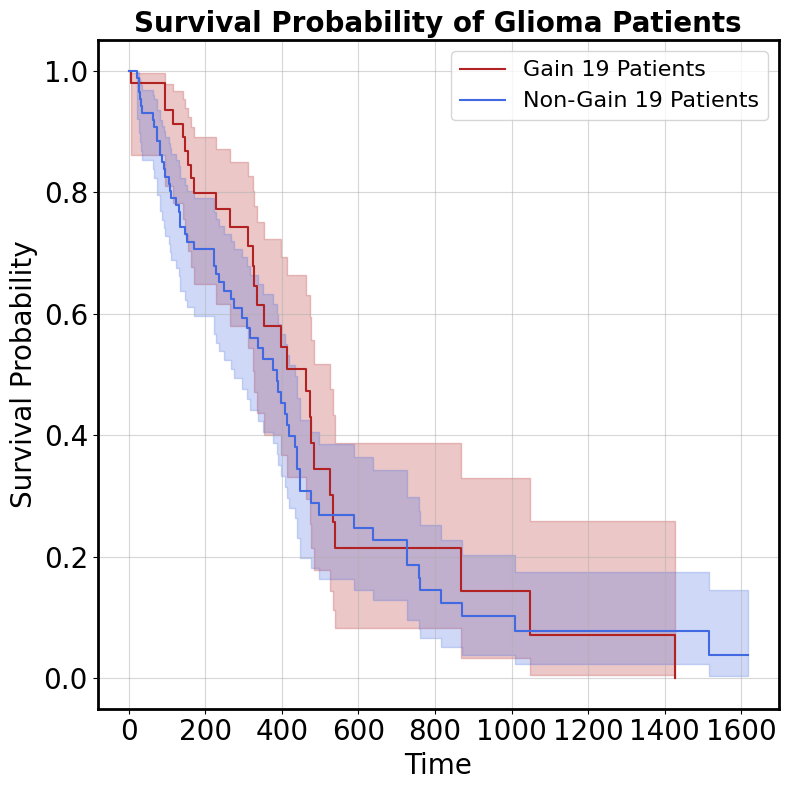

In [160]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# 생존 데이터의 중앙값 계산
median_high = gain_19_patient_df['OS'].median()
median_low = non_gain_19_patient_df['OS'].median()

# 로그 순위 테스트
result = logrank_test(
    non_gain_19_patient_df['OS'],
    gain_19_patient_df['OS'],
    event_observed_A=non_gain_19_patient_df['Censor'],
    event_observed_B=gain_19_patient_df['Censor']
)
print("Log-rank test p-value:", result.p_value)

# Kaplan-Meier Curve 그리기
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

plt.figure(figsize=(8, 8))

# Gain 19 생존 곡선 (firebrick 색상)
kmf_high.fit(gain_19_patient_df['OS'], event_observed=gain_19_patient_df['Censor'], label='Gain 19 Patients')
kmf_high.plot_survival_function(ci_show=True, color='firebrick')

# Non-Gain 19 생존 곡선 (royalblue 색상)
kmf_low.fit(non_gain_19_patient_df['OS'], event_observed=non_gain_19_patient_df['Censor'], label='Non-Gain 19 Patients')
kmf_low.plot_survival_function(ci_show=True, color='royalblue')


# 그래프 설정
plt.title("Survival Probability of Glioma Patients", fontsize=20, fontweight='bold')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Survival Probability", fontsize=20)

# x축과 y축 두껍게 설정
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)  # x축 두께
ax.spines['left'].set_linewidth(2)    # y축 두께
ax.spines['top'].set_linewidth(2)     # 상단 축 두께 (필요 시)
ax.spines['right'].set_linewidth(2)   # 오른쪽 축 두께 (필요 시)

# x, y tick 크기 설정
plt.xticks(fontsize=20)  # xtick 크기와 두께 설정
plt.yticks(fontsize=20)  # ytick 크기와 두께 설정

# 그리드 제거
plt.grid(True, alpha = 0.5)

# 범례 크기 조정
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()
